In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [3]:
reset_graph()

n_features = 3
n_neurons = 5

# two time steps
X0 = tf.placeholder(tf.float32, [None, n_features])
X1 = tf.placeholder(tf.float32, [None, n_features])

Wx = tf.Variable(tf.random_normal(shape=[n_features, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

# tanh as phi
Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [4]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])  # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])  # t = 1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [5]:
Y0_val

array([[-0.0664006 ,  0.96257669,  0.68105793,  0.70918542, -0.89821601],
       [ 0.9977755 , -0.71978903, -0.99657607,  0.96739239, -0.99989718],
       [ 0.99999774, -0.99898803, -0.99999893,  0.99677622, -0.99999988],
       [ 1.        , -1.        , -1.        , -0.99818915,  0.99950868]], dtype=float32)

In [6]:
Y1_val

array([[ 1.        , -1.        , -1.        ,  0.40200251, -0.99999982],
       [-0.12210419,  0.62805265,  0.96718431, -0.99371219, -0.2583937 ],
       [ 0.99999827, -0.9999994 , -0.9999975 , -0.85943305, -0.99998808],
       [ 0.99928284, -0.99999815, -0.99990582,  0.98579627, -0.92205757]], dtype=float32)

# Task
Make the same computation using only one matrix multiplication.

In [7]:
reset_graph()

n_features = 3
n_neurons = 5
m = np.shape(X1_batch)[0]

b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

X0 = tf.placeholder(tf.float32, [m, n_features], name = 'X0')
X1 = tf.placeholder(tf.float32, [m, n_features], name = 'X1')

Wx = tf.Variable(tf.random_normal(shape=[n_features, n_neurons], dtype=tf.float32), name = 'Wx')
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32), name = 'Wy')
W = tf.concat([Wx, Wy], 0)
# W = tf.transpose(W)

# Y0 = tf.placeholder(tf.float32, [m, n_neurons], name = 'Y0')
Y0 = tf.zeros([m, n_neurons], dtype=tf.float32, name = 'Y0')
Y1 = tf.tanh(tf.matmul(tf.concat([X1, Y0], 1), W) + b)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    Y0_val_1, Y1_val_1 = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [8]:
Y0_val_1

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [9]:
Y1_val_1

array([[-1.        ,  1.        , -1.        ,  1.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.99999881,  1.        , -0.99999994,  1.        ,  1.        ],
       [-0.98024863,  0.99999505, -0.9982422 ,  0.99515909,  0.99999183]], dtype=float32)

# Вроде работает, но что-то тут нечисто, надо будет перепроверить

In [10]:
n_steps = 2
n_features = 3
n_neurons = 5

reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_features])
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [11]:
seq_length = tf.placeholder(tf.int32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32,
                                    sequence_length=seq_length)

In [12]:
init = tf.global_variables_initializer()
X_batch = np.array([
        # step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2 (padded with zero vectors)
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

# sequence lengths
seq_length_batch = np.array([2, 1, 2, 2])

In [13]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run(
        [outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

In [14]:
print(outputs_val.shape)
print(states_val.shape)

(4, 2, 5)
(4, 5)


In [15]:
# for the second sample there are zeros in output 
print(outputs_val)

[[[ 0.47544831 -0.13168356 -0.57299101 -0.6720379  -0.42602208]
  [ 0.95215696  0.98389643  0.60721022 -0.96202987  0.99965972]]

 [[ 0.84725708  0.37434804 -0.3608841  -0.91140896  0.57531494]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.96226346  0.72561044 -0.10346794 -0.97833318  0.94315708]
  [ 0.12061961  0.92861468 -0.23777656 -0.27806568  0.97927016]]

 [[-0.07092319  0.9988277   0.99634302  0.99965298  0.99997783]
  [-0.47609991 -0.50878274  0.95791274  0.88778406  0.369149  ]]]


In [16]:
# but in state there are not
print(states_val)

[[ 0.95215696  0.98389643  0.60721022 -0.96202987  0.99965972]
 [ 0.84725708  0.37434804 -0.3608841  -0.91140896  0.57531494]
 [ 0.12061961  0.92861468 -0.23777656 -0.27806568  0.97927016]
 [-0.47609991 -0.50878274  0.95791274  0.88778406  0.369149  ]]


# Name generation
Lets try to do something useful with our RNNs.

Teaser:

It is hard to choose a name for a variable. But its much harder to choose a name for a person. So lets make neural net do it instead!
Dataset consists of 8 thousand people names from different cultures all around the world.
Our toy task be to train a model to generate a name.

/Users/kate/Jupyter Notebook/names.txt

In [17]:
start_token = " "

with open("/Users/kate/Jupyter Notebook/names.txt") as f:
    names = f.readlines()
    names = [start_token + name.lower() for name in names]

In [18]:
print('n samples = ', len(names))
for x in names[::1000]:
    print(x.strip().capitalize())

n samples =  7944
Abagael
Claresta
Glory
Liliane
Prissie
Geeta
Giovanne
Piggy


In [19]:
token_set = set()
for name in names:
    for letter in name:
        token_set.add(letter)


token_set.add(')')
tokens = list(token_set)
tokens.sort()

print('n_tokens = ', len(tokens))

n_tokens =  31


In [20]:
token_to_id = {t: i for i, t in enumerate(tokens)}

id_to_token = {i: t for i, t in enumerate(tokens)}

16


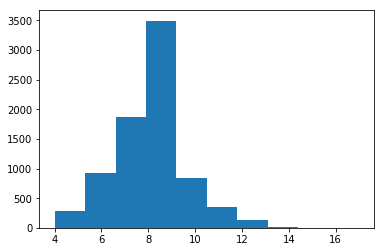

In [21]:
plt.hist(list(map(len, names)))

MAX_LEN = min([60, max(list(map(len, names)))])-1

print(MAX_LEN)

In [22]:
names_ix = list(map(lambda name: list(map(token_to_id.get, name + ')')), names))


for i in range(len(names_ix)):
    names_ix[i] = names_ix[i][:MAX_LEN+1] #crop too long
    
    if len(names_ix[i]) < MAX_LEN+1:
        names_ix[i] += [token_to_id[" "]]*(MAX_LEN+1 - len(names_ix[i])) #pad too short
        
assert len(set(map(len, names_ix))) == 1

names_ix = np.array(names_ix)

In [23]:
names_ix[:10]

array([[ 1,  5,  6,  5, 11,  5,  9, 16,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6,  5, 11,  5, 13, 16,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6,  6,  9,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6,  6,  9, 29,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6,  6, 13,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6,  6, 13,  9,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6,  6, 29,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6, 13, 11,  5,  9, 16,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6, 13, 11,  5, 13, 16,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6, 13, 11,  5, 16,  9,  0,  3,  1,  1,  1,  1,  1,  1,  1]])

In [24]:
def sample_batch(data, batch_size):
    
    rows = data[np.random.randint(0, len(data), size=batch_size)]
    x = rows[:, :-1]
    y = rows[:, 1:]
    
    count = lambda r: np.sum([id_to_token[t] != ' ' for t in r])
    lengths = list(map(count, x))
    
    return x, y, lengths

In [25]:
x, y, length = sample_batch(names_ix, 10)
y.shape

(10, 16)

In [26]:
x

array([[ 1, 23,  5, 23,  7, 12,  5,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [ 1, 24, 19, 17, 16, 13, 18,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  7,  9,  7, 13, 16,  9, 29,  0,  3,  1,  1,  1,  1,  1,  1],
       [ 1,  7,  5, 16,  8, 27,  9, 16, 16,  0,  3,  1,  1,  1,  1,  1],
       [ 1,  6,  5, 22, 18,  5,  6,  5, 23,  0,  3,  1,  1,  1,  1,  1],
       [ 1,  5, 25,  6,  9,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1, 18, 13, 18,  9, 24, 24,  5,  0,  3,  1,  1,  1,  1,  1,  1],
       [ 1, 16, 19, 22, 13,  9,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  9, 16, 16, 13, 19, 24, 24,  0,  3,  1,  1,  1,  1,  1,  1],
       [ 1, 13, 26, 19, 22,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1]])

In [27]:
y

array([[23,  5, 23,  7, 12,  5,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1],
       [24, 19, 17, 16, 13, 18,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 7,  9,  7, 13, 16,  9, 29,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [ 7,  5, 16,  8, 27,  9, 16, 16,  0,  3,  1,  1,  1,  1,  1,  1],
       [ 6,  5, 22, 18,  5,  6,  5, 23,  0,  3,  1,  1,  1,  1,  1,  1],
       [ 5, 25,  6,  9,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [18, 13, 18,  9, 24, 24,  5,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [16, 19, 22, 13,  9,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 9, 16, 16, 13, 19, 24, 24,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [13, 26, 19, 22,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]])

In [28]:
length

[8, 8, 9, 10, 10, 6, 9, 7, 9, 6]

# Network inputs

In [29]:
reset_graph()

X = tf.placeholder(tf.int32, [None, None], name= 'X')
y = tf.placeholder(tf.int32, [None, None], name = 'y')
lengths = tf.placeholder(tf.int32, [None], name = 'lengths')
learning_rate_ph = tf.placeholder(dtype=tf.float32, shape=[])

In [30]:
n_neurons = 60
embedding_size = 8
vocabulary_size = len(tokens)
batch_size = 10
bag_window = 2
state_size = 4
n_steps = MAX_LEN # this is number of unrollings

In [31]:
embedding_mtx = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)) # embed_matrix
embed = tf.nn.embedding_lookup(embedding_mtx, y) # embed

init_state = tf.zeros([batch_size, state_size])
x_one_hot = tf.one_hot(x, vocabulary_size)
rnn_inputs = tf.unstack(x_one_hot, axis=1)

In [32]:
cell = tf.contrib.rnn.BasicRNNCell(state_size)
rnn_outputs, final_state = tf.contrib.rnn.static_rnn(cell, rnn_inputs, initial_state=init_state)

In [33]:
context_sum = tf.reduce_sum(embed, 1)
pred_logits = tf.matmul(context_sum, tf.transpose(embedding_mtx))

print(vocabulary_size)
labels_one_hot = tf.one_hot(y, vocabulary_size)

stepwise_cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(
    labels=labels_one_hot,
    logits=pred_logits)
    
loss = tf.reduce_mean(stepwise_cross_entropy)

pred_probas = tf.nn.softmax(pred_logits)

print(pred_probas)
prediction = tf.argmax(pred_probas, axis = 1)

train_op = tf.train.AdamOptimizer(learning_rate_ph).minimize(loss)

last_word_probas = pred_probas[:, -1]

31
Tensor("Softmax:0", shape=(?, 31), dtype=float32)


In [35]:
def generate_sample(sess, seed_phrase=None, N=MAX_LEN, n_snippets=1):
    
    if seed_phrase is None:
        seed_phrase = ' '
    elif seed_phrase[0].isalpha():
        seed_phrase = ' ' + seed_phrase
    seed_phrase = seed_phrase.lower()
    seed_phrase = np.array([token_to_id[tok] for tok in seed_phrase])
    L = len(seed_phrase)
    snippets = []
    for _ in range(n_snippets):
        x = np.zeros(N)
        x[:len(seed_phrase)] = seed_phrase
        for n in range(N - L):
            feed_dict = {X: x[:L + n].reshape([1, -1]), lengths: [len(x)]}
            p = sess.run(last_word_probas, feed_dict=feed_dict).reshape(-1)
            ix = np.random.choice(np.arange(len(tokens)), p=p)
            x[L + n] = ix
        snippet = ''.join([id_to_token[idx] for idx in x])
        if ')' in snippet:
            upto = snippet.index(')')
            snippet = snippet[:upto]
        snippets.append(snippet.strip().capitalize())
    return snippets

In [36]:
def print_pred(y_pred, k = 3):
    for i in range(k):
        print("".join( [id_to_token[t] for t in y_pred[i,:]]))

In [37]:
s = tf.Session()
    
s.run(tf.global_variables_initializer())

n_epochs = 5
batches_per_epoch = 500
batch_size = 10
lr = 1e-2
for epoch in range(n_epochs):

    print(">>Generated: ", generate_sample(s, n_snippets=6))
    print("-------\n")
    avg_cost = 0
    for batch in range(batches_per_epoch):
        x_, y_, len_ = sample_batch(names_ix, batch_size)

        _, iloss, y_pred = s.run([train_op, loss, prediction], {X: x_,
                                                                y: y_,
                                                                lengths: len_,
                                                                learning_rate_ph: lr})
        avg_cost += iloss

    print("EPOCH: ", epoch)
    print("AVERAGE LOSS: ", avg_cost/batches_per_epoch)
    print(">>Predicted: ")
    print_pred(y_pred)

print(">>Generated: ", generate_sample(s, n_snippets=6))

InvalidArgumentError: You must feed a value for placeholder tensor 'y' with dtype int32 and shape [?,?]
	 [[Node: y = Placeholder[dtype=DT_INT32, shape=[?,?], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'y', defined at:
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-7964d225d432>", line 4, in <module>
    y = tf.placeholder(tf.int32, [None, None], name = 'y')
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1746, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3051, in _placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'y' with dtype int32 and shape [?,?]
	 [[Node: y = Placeholder[dtype=DT_INT32, shape=[?,?], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
